In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read dhs_indicators.csv 
indicators = pd.read_csv('dhs_indicators.csv')

# read dhs_subntl_data_raw.csv 
# specify types of columns to reduce memory usage
# DataId: integer
# SurveyId: string
# Indicator: string
# IsPreferred: boolean
# Value: float
# SDRID: string
# Precision: integer
# RegionId: string
# SurveyYearLabel: string
# SurveyType: string
# SurveyYear: integer
# IndicatorOrder: integer
# DHS_CountryCode: string
# CILow: float
# CountryName: string
# IndicatorType: string
# CharacteristicId: integer
# CharacteristicCategory: string
# IndicatorId: string
# CharacteristicOrder: integer
# CharacteristicLabel: string
# ByVariableLabel: string
# DenominatorUnweighted: float
# DenominatorWeighted: float
# CIHigh: float
# IsTotal: boolean
# ByVariableId: integer
# LevelRank: float
types = {'DataId': 'int32',
            'SurveyId': 'str',
            'Indicator': 'str',
            'IsPreferred': 'bool',
            'Value': 'float64',
            'SDRID': 'str',
            'Precision': 'int8',
            'RegionId': 'str',
            'SurveyYearLabel': 'str',
            'SurveyType': 'str',
            'SurveyYear': 'int32',
            'IndicatorOrder': 'int32',
            'DHS_CountryCode': 'str',
            'CILow': 'float64',
            'CountryName': 'str',
            'IndicatorType': 'str',
            'CharacteristicId': 'int32',
            'CharacteristicCategory': 'str',
            'IndicatorId': 'str',
            'CharacteristicOrder': 'int32',
            'CharacteristicLabel': 'str',
            'ByVariableLabel': 'str',
            'DenominatorUnweighted': 'float64',
            'DenominatorWeighted': 'float64',
            'CIHigh': 'float32',
            'IsTotal': 'bool',
            'ByVariableId': 'int32',
            'LevelRank': 'float16'}

subntl_raw = pd.read_csv('dhs_subntl_data_raw.csv', dtype=types)

# subntl_raw = pd.read_csv('dhs_subntl_data_raw.csv')

subntl_raw.iloc[0,:]

DataId                                                    4921980
SurveyId                                                AF2015DHS
Indicator                 Child took antimalarial drugs for fever
IsPreferred                                                 False
Value                                                        22.2
SDRID                                                  CHFEVTCAML
Precision                                                       1
RegionId                                          AFDHS2015534001
SurveyYearLabel                                              2015
SurveyType                                                    DHS
SurveyYear                                                   2015
IndicatorOrder                                           94036020
DHS_CountryCode                                                AF
CILow                                                         NaN
CountryName                                           Afghanistan
IndicatorT

In [3]:
# get memory usage of subntl_raw
subntl_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67699 entries, 0 to 67698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DataId                  67699 non-null  int32  
 1   SurveyId                67699 non-null  object 
 2   Indicator               67699 non-null  object 
 3   IsPreferred             67699 non-null  bool   
 4   Value                   67699 non-null  float64
 5   SDRID                   67699 non-null  object 
 6   Precision               67699 non-null  int8   
 7   RegionId                67699 non-null  object 
 8   SurveyYearLabel         67699 non-null  object 
 9   SurveyType              67699 non-null  object 
 10  SurveyYear              67699 non-null  int32  
 11  IndicatorOrder          67699 non-null  int32  
 12  DHS_CountryCode         67699 non-null  object 
 13  CILow                   1551 non-null   float64
 14  CountryName             67699 non-null

In [4]:
# subntl_raw.LevelRank.value_counts()
subntl_raw.IsPreferred.value_counts()

True     54573
False    13126
Name: IsPreferred, dtype: int64

In [5]:
# filter rows with IsPreferred = True, and save to subntl
subntl = subntl_raw[subntl_raw['IsPreferred'] == True].copy().reset_index(drop=True)
subntl.head()

,DataId,SurveyId,Indicator,IsPreferred,Value,SDRID,Precision,RegionId,SurveyYearLabel,SurveyType,...,IndicatorId,CharacteristicOrder,CharacteristicLabel,ByVariableLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal,ByVariableId,LevelRank
0,1123504,AF2015DHS,Child took antimalarial drugs for fever,True,21.9,CHFEVTCAML,1,AFDHS2015534001,2015,DHS,...,CH_FEVT_C_AML,1534001,Kabul,Five years preceding the survey,217.0,1078.0,NaN,False,14001,1.0
1,3511157,AF2015DHS,Child took antimalarial drugs for fever,True,2.5,CHFEVTCAML,1,AFDHS2015534002,2015,DHS,...,CH_FEVT_C_AML,1534002,Kapisa,Five years preceding the survey,182.0,42.0,NaN,False,14001,1.0
2,1123109,AF2015DHS,Child took antimalarial drugs for fever,True,5.7,CHFEVTCAML,1,AFDHS2015534003,2015,DHS,...,CH_FEVT_C_AML,1534003,Parwan,Five years preceding the survey,100.0,75.0,NaN,False,14001,1.0
3,4452179,AF2015DHS,Child took antimalarial drugs for fever,True,1.1,CHFEVTCAML,1,AFDHS2015534004,2015,DHS,...,CH_FEVT_C_AML,1534004,Wardak,Five years preceding the survey,232.0,109.0,NaN,False,14001,1.0
4,5458540,AF2015DHS,Child took antimalarial drugs for fever,True,7.8,CHFEVTCAML,1,AFDHS2015534005,2015,DHS,...,CH_FEVT_C_AML,1534005,Logar,Five years preceding the survey,100.0,54.0,NaN,False,14001,1.0


In [6]:
# columns to remove: SurveyId, IsPreferred, SDRID, Precision, SurveyYearLabel, IndicatorOrder, IndicatorType, CharacteristicCategory, CharacteristicOrder, ByVariableLabel, ByVariableId, LevelRank
subntl.drop(['SurveyId', 'IsPreferred', 'SDRID', 'Precision', 'SurveyYearLabel', 'IndicatorOrder', 'IndicatorType', 'CharacteristicCategory', 'CharacteristicOrder', 'ByVariableLabel', 'ByVariableId', 'LevelRank'], axis=1, inplace=True)

In [7]:
# sort subntl by DHS_CountryCode, SurveyYear, CharacteristicId
subntl.sort_values(by=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId'], inplace=True) 
subntl.head()

,DataId,Indicator,Value,RegionId,SurveyType,SurveyYear,DHS_CountryCode,CILow,CountryName,CharacteristicId,IndicatorId,CharacteristicLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal
0,1123504,Child took antimalarial drugs for fever,21.9,AFDHS2015534001,DHS,2015,AF,NaN,Afghanistan,534001,CH_FEVT_C_AML,Kabul,217.0,1078.0,NaN,False
1945,5978331,Children with fever who took antimalarial drugs,21.9,AFDHS2015534001,DHS,2015,AF,NaN,Afghanistan,534001,ML_FEVT_C_AML,Kabul,217.0,1078.0,NaN,False
5685,5863895,Children who took any ACT,0.0,AFDHS2015534001,DHS,2015,AF,NaN,Afghanistan,534001,ML_AMLD_C_ACT,Kabul,37.0,236.0,NaN,False
6755,5863905,Children who took Quinine,4.4,AFDHS2015534001,DHS,2015,AF,NaN,Afghanistan,534001,ML_AMLD_C_QNN,Kabul,37.0,236.0,NaN,False
7954,5863891,Children who took SP/Fansidar,84.3,AFDHS2015534001,DHS,2015,AF,NaN,Afghanistan,534001,ML_AMLD_C_SPF,Kabul,37.0,236.0,NaN,False


In [8]:
len(subntl.IndicatorId.unique())

44

In [9]:
len(subntl.DHS_CountryCode.unique())

69

In [10]:
# filter indicators with IndicatorId in subntl.IndicatorId
indicators = indicators[indicators['IndicatorId'].isin(subntl.IndicatorId.unique())].copy().reset_index(drop=True)
indicators.head()

,Definition,NumberScale,IndicatorType,MeasurementType,IsQuickStat,ShortName,IndicatorId,Level1,IndicatorTotalId,Level2,...,IndicatorOldId,TagIds,DenominatorWeightedId,Label,IndicatorOrder,Denominator,QuickStatOrder,IndicatorSpecial1Id,DenominatorUnweightedId,IndicatorSpecial2Id
0,Percentage of children born in the five (or th...,1,I,Percent,0,Fever in the two weeks preceding the survey,CH_FEVR_C_FEV,Child Health,NaN,Prevalence of fever,...,84275002.0,77,CH_FEVR_C_NUM,Children with fever in the last two weeks,94006010,Children under age five (or three),NaN,NaN,CH_FEVR_C_UNW,NaN
1,Percentage of children with fever in the two w...,1,I,Percent,0,Advice or treatment sought same or next day,CH_FEVT_C_AT1,Child Health,NaN,Treatment of fever,...,NaN,NaN,CH_FEVT_C_NUM,Advice or treatment for fever sought the same ...,94036000,Children under age three/five with fever in th...,NaN,NaN,CH_FEVT_C_UNW,NaN
2,Percentage of children with fever in the two w...,1,I,Percent,0,Advice or treatment was sought from a health f...,CH_FEVT_C_ADV,Child Health,NaN,Treatment of fever,...,NaN,"10, 77",CH_FEVT_C_NUM,Advice or treatment for fever sought from a he...,94036010,Children under age five (or three) with fever ...,NaN,NaN,CH_FEVT_C_UNW,NaN
3,Percentage of children with fever in the two w...,1,I,Percent,0,Took antimalarial drugs,CH_FEVT_C_AML,Child Health,NaN,Treatment of fever,...,NaN,10,CH_FEVT_C_NUM,Child took antimalarial drugs for fever,94036020,Children under age five (or three) with fever ...,NaN,NaN,CH_FEVT_C_UNW,NaN
4,Percentage of children with fever in the two w...,1,I,Percent,0,Took antibiotic drugs,CH_FEVT_C_ABI,Child Health,NaN,Treatment of fever,...,NaN,10,CH_FEVT_C_NUM,Child took antibiotic drugs for fever,94036030,Children under age five (or three) with fever ...,NaN,NaN,CH_FEVT_C_UNW,NaN


In [12]:
# transpose subntl so that each IndicatorId is a column
subntl_v = subntl.pivot_table(index=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId', 'CharacteristicLabel', 'CountryName', 'SurveyType', 'RegionId'], columns='IndicatorId', values='Value').reset_index()
subntl_ci_low = subntl.pivot_table(index=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId', 'CharacteristicLabel', 'CountryName', 'SurveyType', 'RegionId'], columns='IndicatorId', values='CILow').reset_index()
subntl_ci_high = subntl.pivot_table(index=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId', 'CharacteristicLabel', 'CountryName', 'SurveyType', 'RegionId'], columns='IndicatorId', values='CIHigh').reset_index()
subntl_v_denom_unw = subntl.pivot_table(index=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId', 'CharacteristicLabel', 'CountryName', 'SurveyType', 'RegionId'], columns='IndicatorId', values='DenominatorUnweighted').reset_index()
subntl_v_denom_w = subntl.pivot_table(index=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId', 'CharacteristicLabel', 'CountryName', 'SurveyType', 'RegionId'], columns='IndicatorId', values='DenominatorWeighted').reset_index()

subntl_v.head()

IndicatorId,DHS_CountryCode,SurveyYear,CharacteristicId,CharacteristicLabel,CountryName,SurveyType,RegionId,CH_FEVR_C_FEV,CH_FEVT_C_ABI,CH_FEVT_C_ADV,...,ML_PMAL_C_NMR,ML_PMAL_C_RDE,ML_PMAL_C_RDL,ML_PMAL_C_RDR,ML_PMAL_C_RDT,ML_PMAL_C_RDU,ML_PMAL_C_UEM,ML_PMAL_C_UER,ML_PMAL_C_UNM,ML_PMAL_C_UNR
0,AF,2015,534001,Kabul,Afghanistan,DHS,AFDHS2015534001,29.3,37.1,56.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,2015,534002,Kapisa,Afghanistan,DHS,AFDHS2015534002,20.0,32.3,44.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,2015,534003,Parwan,Afghanistan,DHS,AFDHS2015534003,10.9,50.9,66.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,2015,534004,Wardak,Afghanistan,DHS,AFDHS2015534004,33.1,51.3,54.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF,2015,534005,Logar,Afghanistan,DHS,AFDHS2015534005,13.0,36.8,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# count null values in 'ML_FEVT_C_ADV' and 'CH_FEVT_C_ADV'
subntl_v[['ML_FEVT_C_ADV', 'CH_FEVT_C_ADV']].isnull().sum()

IndicatorId
ML_FEVT_C_ADV    1336
CH_FEVT_C_ADV    1363
dtype: int64

### Treatment seeking behavior among children with fever

In [14]:
## indicators related to fever in the past 2 weeks

# filter rows where Indicator contains 'two', show Indicator and IndicatorId columns, count the occurrences of each IndicatorId
# subntl[subntl['Indicator'].str.contains('two')][['Indicator', 'IndicatorId']].value_counts()# groupby('IndicatorId').count()

indicators[indicators['Label'].str.contains('two')][['IndicatorId', 'Label', 'MeasurementType']].value_counts()# groupby('IndicatorId').count()

IndicatorId    Label                                                                            MeasurementType
CH_FEVR_C_FEV  Children with fever in the last two weeks                                        Percent            1
CH_FEVT_C_NUM  Number of children with fever in the last two weeks                              Number             1
CH_FEVT_C_UNW  Number of children with fever in the last two weeks (unweighted)                 Number             1
ML_FEVR_C_FEV  Children under 5 with fever in the last two weeks                                Percent            1
ML_FEVT_C_NUM  Number of children under age five with fever in the last two weeks               Number             1
ML_FEVT_C_UNW  Number of children under age five with fever in the last two weeks (unweighted)  Number             1
dtype: int64

In [15]:
## indicators related to care seeking

# filter rows where Indicator contains 'sought', show Indicator and IndicatorId columns, count the occurrences of each IndicatorId
# subntl[subntl['Indicator'].str.contains('sought')][['Indicator', 'IndicatorId']].value_counts()# groupby('IndicatorId').count()

indicators[indicators['Definition'].str.contains('sought')][['IndicatorId', 'Label', 'MeasurementType']].value_counts()# groupby('IndicatorId').count()

IndicatorId    Label                                                                                 MeasurementType
CH_FEVT_C_ADV  Advice or treatment for fever sought from a health facility or provider               Percent            1
CH_FEVT_C_AT1  Advice or treatment for fever sought the same day or the next day                     Percent            1
ML_FEVT_C_ADS  Children with fever for whom advice or treatment was sought the same or the next day  Percent            1
ML_FEVT_C_ADV  Children with fever for whom advice or treatment was sought                           Percent            1
dtype: int64

In [16]:
# ML_FEVT_C_ADV and CH_FEVT_C_ADV are percentage values, we want the raw counts
# multiply ML_FEVT_C_ADV and CH_FEVT_C_ADV by ML_FEVT_C_NUM and CH_FEVT_C_NUM respectively
subntl_v['ML_FEVT_C_ADV_num'] = subntl_v['ML_FEVT_C_ADV'] * subntl_v['ML_FEVT_C_NUM'] / 100.0
subntl_v['CH_FEVT_C_ADV_num'] = subntl_v['CH_FEVT_C_ADV'] * subntl_v['CH_FEVT_C_NUM'] / 100.0

Text(0.5, 0.98, 'Difference between ML and CH survey in\n number of febrile children who sought care')

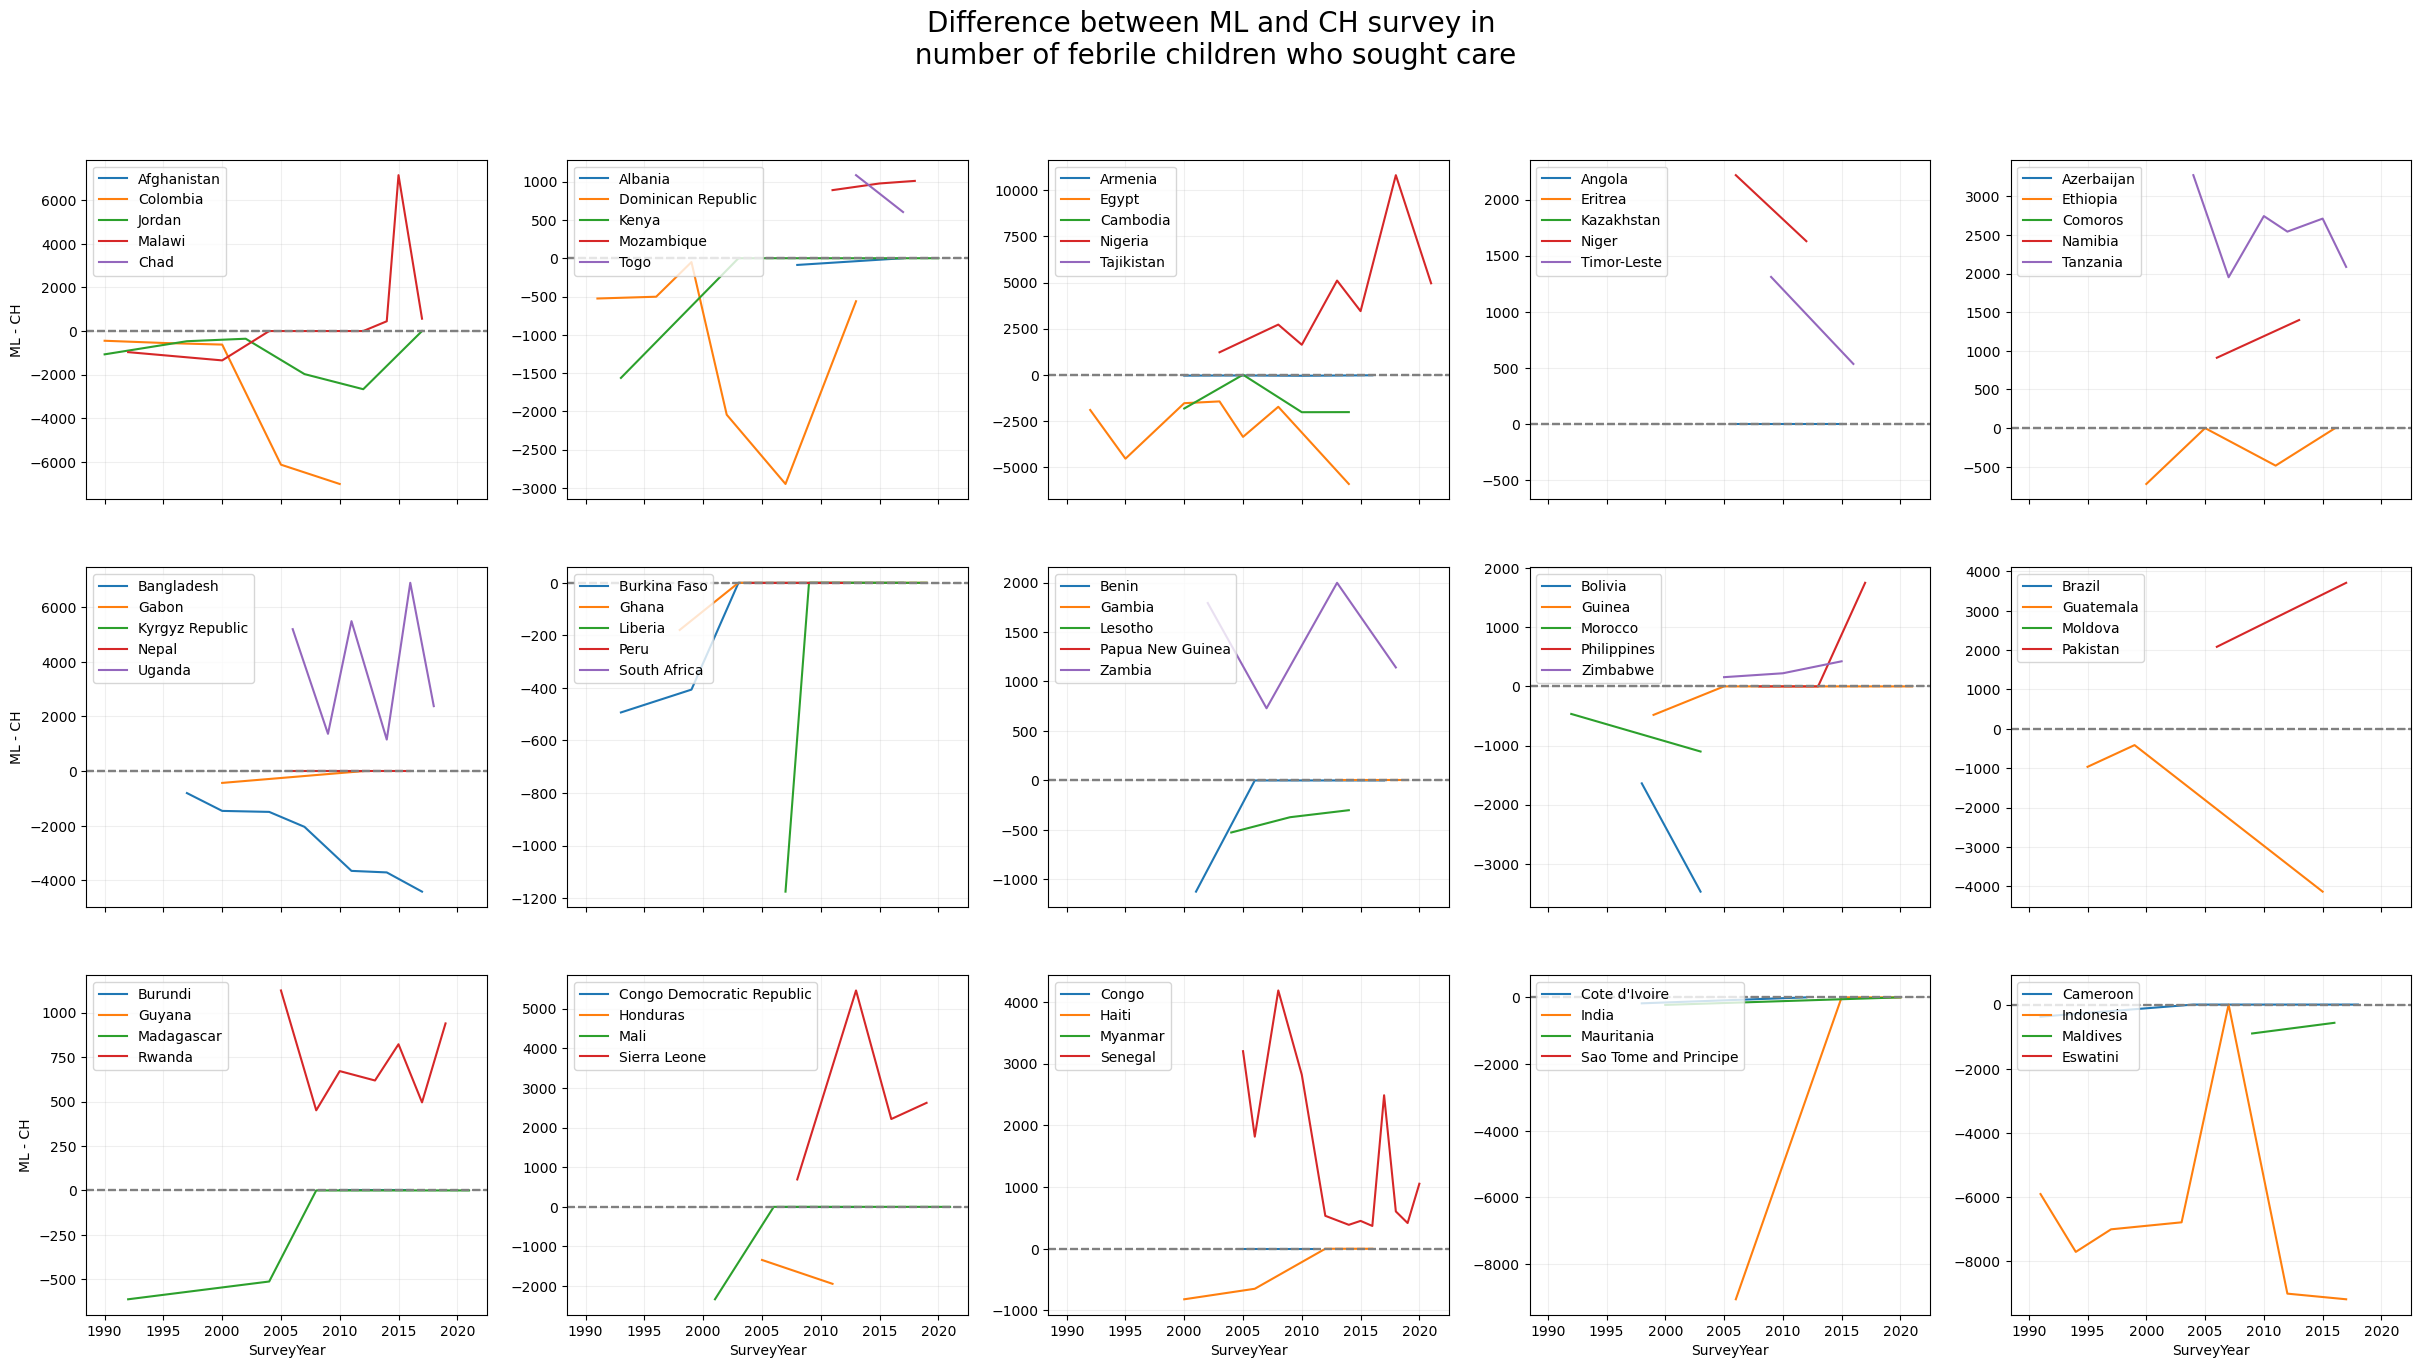

In [17]:
# plot ML_FEVT_C_ADV, CH_FEVT_C_ADV over time for each country
# there are 69 countries in subntl_v, we don't want to plot all of them in 1 graph
# we want to plot 5 countries in 1 graph, so we'd need 14 subplots
# we'll plot 5 countries in 1 graph, and then plot the next 5 countries in the next graph, and so on

# get list of countries
countries = subntl_v['CountryName'].unique()
# subplots
fig, axs = plt.subplots(3, 5, figsize=(30, 15), sharex=True, sharey=False)
axs_flat = axs.flatten()
# plot each country
for i, country in enumerate(countries):
    # get country data
    country_data = subntl_v[subntl_v['CountryName'] == country]
    # group by SurveyYear, get the sum of ML_FEVT_C_ADV, sum of CH_FEVT_C_ADV
    country_data = country_data.groupby('SurveyYear').sum()[['ML_FEVT_C_ADV_num', 'CH_FEVT_C_ADV_num']]
    # plot ML_FEVT_C_ADV, CH_FEVT_C_ADV over time for each country, same color, different line style
    # country_data.plot(ax=axs_flat[i%15], style=['-', '--'])
    # plot the difference between ML_FEVT_C_ADV_num and CH_FEVT_C_ADV_num over time for each country, label the line with country name
    (country_data['ML_FEVT_C_ADV_num'] - country_data['CH_FEVT_C_ADV_num']).plot(ax=axs_flat[i%15], label=country)
    # plot horizontal line at y=0
    axs_flat[i%15].axhline(y=0, color='grey', linestyle='--')

# set y label for axes in the first column
for i in range(0, 15, 5):
    axs_flat[i].set_ylabel('ML - CH')

# show legend in all subplots
for i in range(15):
    axs_flat[i].legend(loc='upper left')
    axs_flat[i].grid(alpha=0.2)

# set figure title
fig.suptitle('Difference between ML and CH survey in\n number of febrile children who sought care', fontsize=20)


In [18]:
country_data.head()

IndicatorId,ML_FEVT_C_ADV_num,CH_FEVT_C_ADV_num
SurveyYear,,
2005,156.125,0.0
2010,221.810,0.0
2015,424.409,0.0


In [19]:
# prepare dataframe to export to csv
df = pd.DataFrame()
df['id'] = subntl_v['RegionId']
df['iso2'] = subntl_v['DHS_CountryCode']
df['country'] = subntl_v['CountryName']
df['region'] = subntl_v['CharacteristicLabel']
df['year'] = subntl_v['SurveyYear']
df['source'] = subntl_v['SurveyType']

# column frac_sought_care_max is the max fraction of febrile children who sought care
# it should be ML_FEVT_C_ADV if ML_FEVT_C_NUM is not null and CH_FEVT_C_ADV is null
# it should be CH_FEVT_C_ADV if CH_FEVT_C_NUM is not null and ML_FEVT_C_ADV is null
# it should be max(ML_FEVT_C_ADV, CH_FEVT_C_ADV) if ML_FEVT_C_NUM is not null and CH_FEVT_C_ADV is not null
# it should be null if ML_FEVT_C_NUM is null and CH_FEVT_C_ADV is null
df['frac_sought_care_max'] = np.where(subntl_v['ML_FEVT_C_NUM'].notnull() & subntl_v['CH_FEVT_C_ADV'].isnull(), subntl_v['ML_FEVT_C_ADV'], np.where(subntl_v['CH_FEVT_C_NUM'].notnull() & subntl_v['ML_FEVT_C_ADV'].isnull(), subntl_v['CH_FEVT_C_ADV'], np.where(subntl_v['ML_FEVT_C_NUM'].notnull() & subntl_v['CH_FEVT_C_ADV'].notnull(), np.maximum(subntl_v['ML_FEVT_C_ADV'], subntl_v['CH_FEVT_C_ADV']), np.nan)))
# divide by 100 to get the fraction from percentage
df['frac_sought_care_max'] = df['frac_sought_care_max'] / 100.0

# column frac_sought_care_max is the min fraction of febrile children who sought care
# similar logic as above but use np.minimum instead of np.maximum
df['frac_sought_care_min'] = np.where(subntl_v['ML_FEVT_C_NUM'].notnull() & subntl_v['CH_FEVT_C_ADV'].isnull(), subntl_v['ML_FEVT_C_ADV'], np.where(subntl_v['CH_FEVT_C_NUM'].notnull() & subntl_v['ML_FEVT_C_ADV'].isnull(), subntl_v['CH_FEVT_C_ADV'], np.where(subntl_v['ML_FEVT_C_NUM'].notnull() & subntl_v['CH_FEVT_C_ADV'].notnull(), np.minimum(subntl_v['ML_FEVT_C_ADV'], subntl_v['CH_FEVT_C_ADV']), np.nan)))
df['frac_sought_care_min'] = df['frac_sought_care_min'] / 100.0

df.head()

,id,iso2,country,region,year,source,frac_sought_care_max,frac_sought_care_min
0,AFDHS2015534001,AF,Afghanistan,Kabul,2015,DHS,0.569,0.569
1,AFDHS2015534002,AF,Afghanistan,Kapisa,2015,DHS,0.449,0.449
2,AFDHS2015534003,AF,Afghanistan,Parwan,2015,DHS,0.669,0.669
3,AFDHS2015534004,AF,Afghanistan,Wardak,2015,DHS,0.541,0.541
4,AFDHS2015534005,AF,Afghanistan,Logar,2015,DHS,0.490,0.490


In [20]:
df_def = {'id': 'Region ID as from DHS survey, format: <country_code><survey_type><year><region_numeric_id>',
            'iso2': 'ISO2 code for country, as from DHS_CountryCode',
            'country': 'Country name, as from CountryName',
            'region': 'Region name, as from CharacteristicLabel',
            'year': 'Survey year, as from SurveyYear',
            'source': 'Survey type, as from SurveyType',
            'frac_sought_care_max': 'Max fraction of febrile children who sought care, as from ML_FEVT_C_ADV or CH_FEVT_C_ADV',
            'frac_sought_care_min': 'Min fraction of febrile children who sought care, as from ML_FEVT_C_ADV or CH_FEVT_C_ADV'}

Sanity check

Text(0.5, 0.98, 'Difference between max and min in\n number of febrile children who sought care')

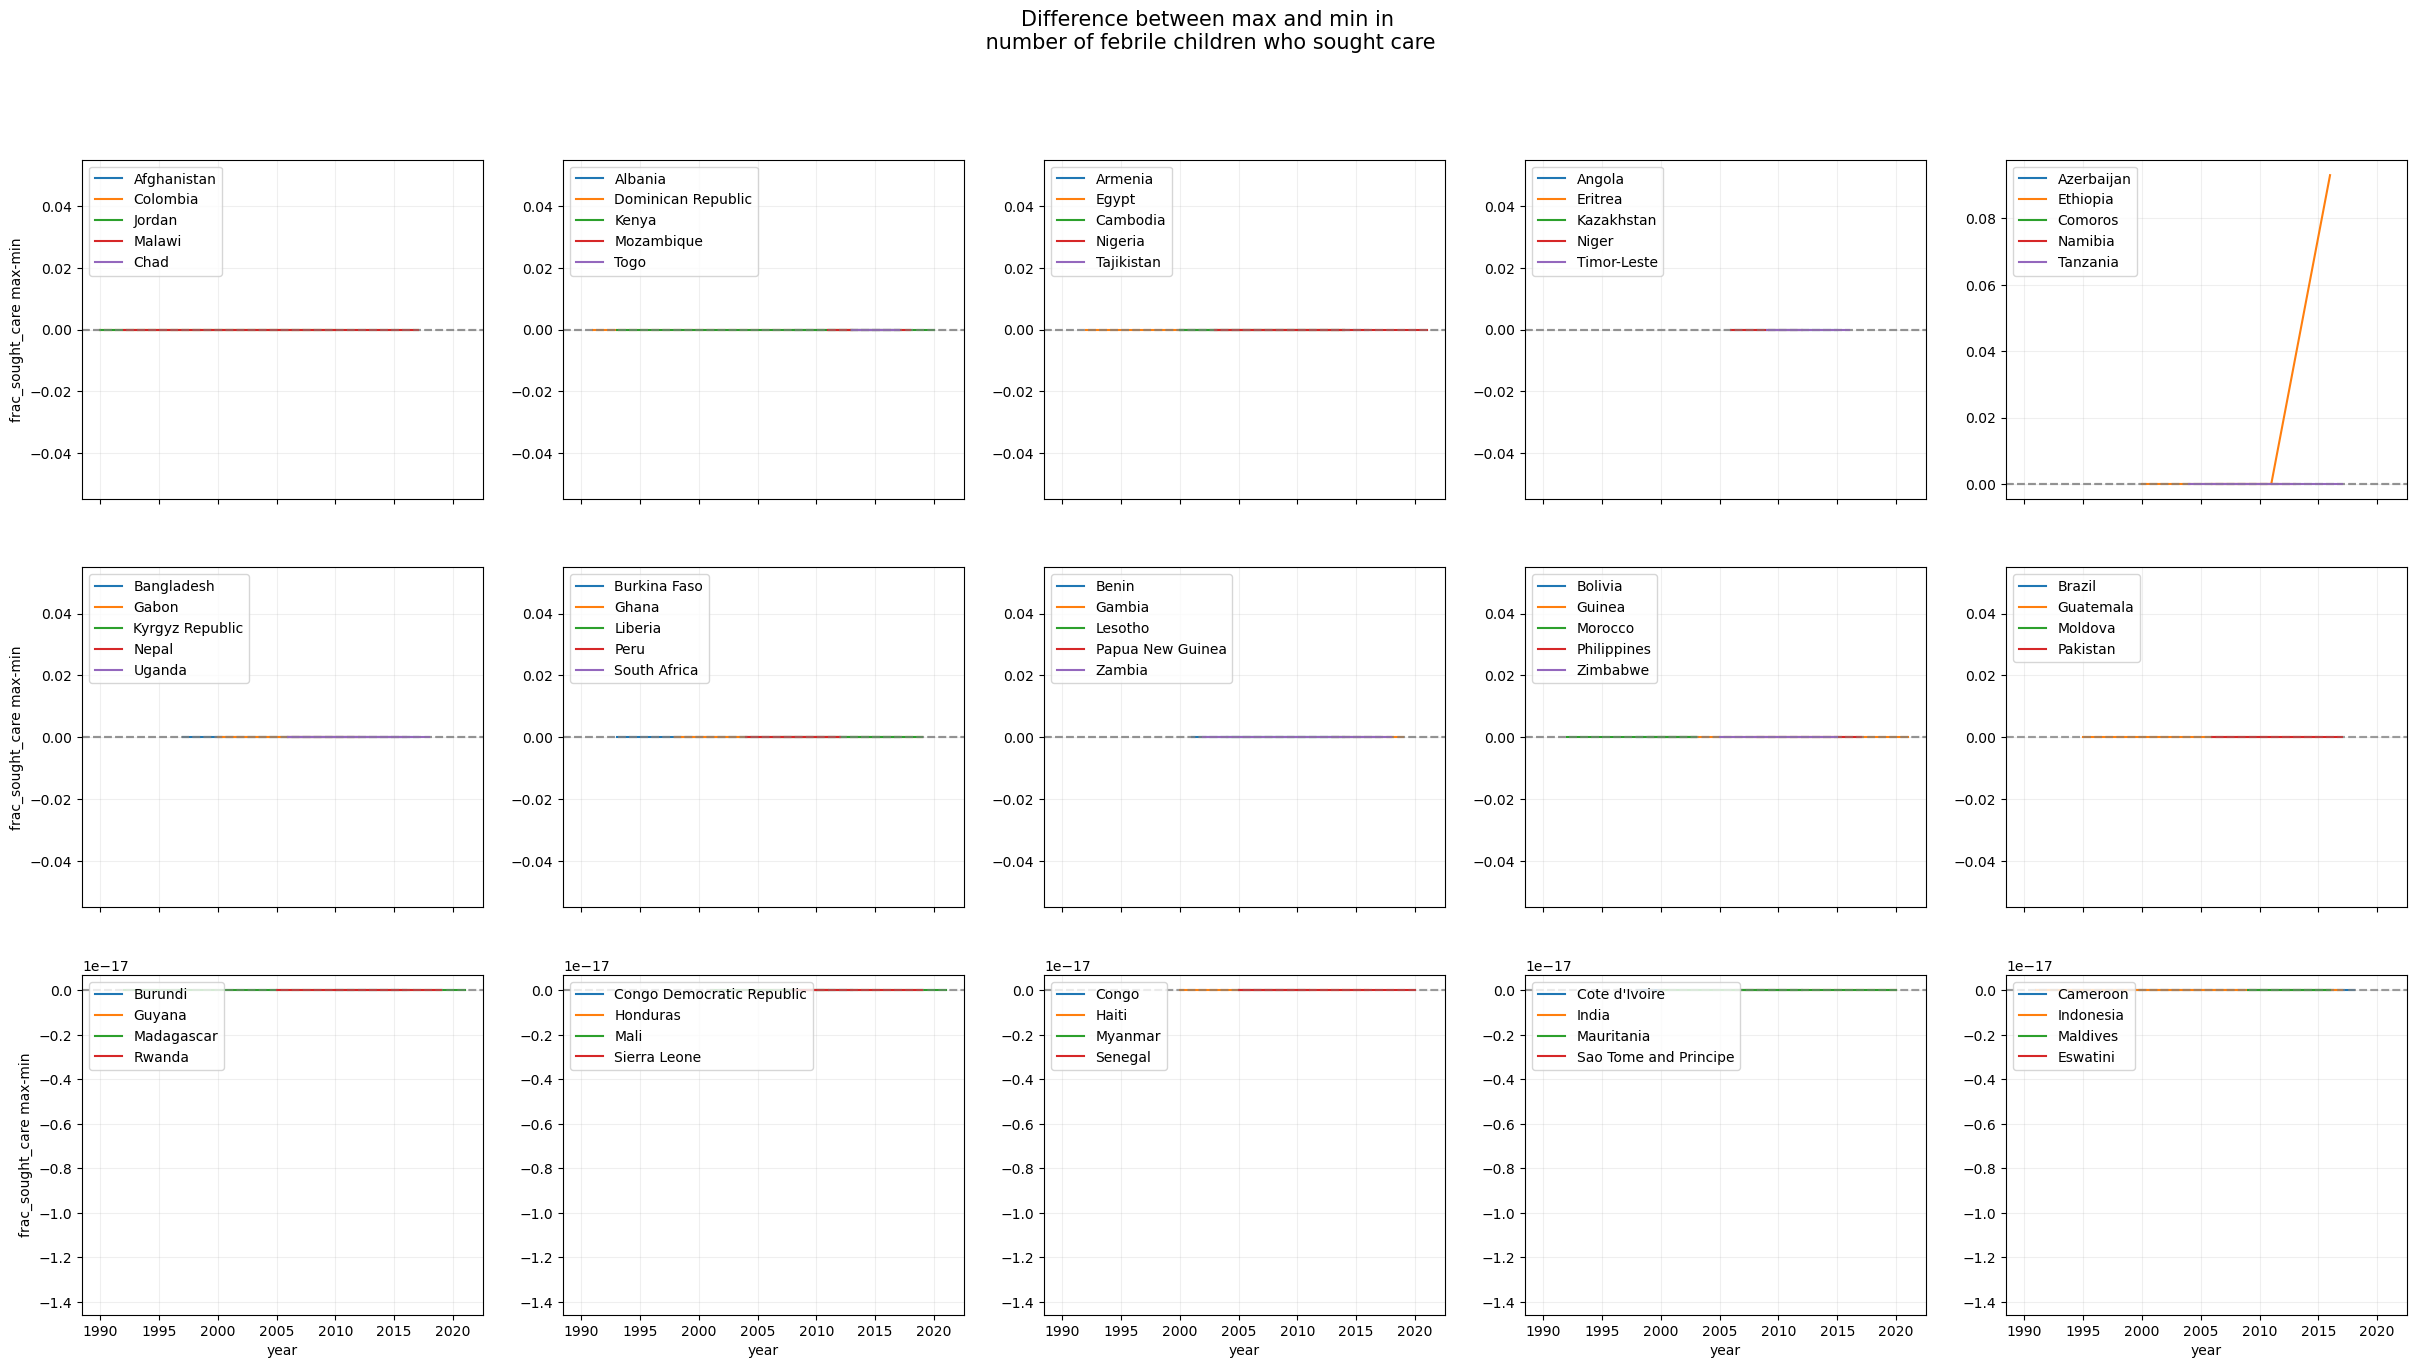

In [21]:
# if ML_FEVT_C_ADV, CH_FEVT_C_ADV are really identical or interchangeable,
# we would see this plot as a horizontal line at y=0

# get list of countries
countries = df['country'].unique()
# subplots
fig, axs = plt.subplots(3, 5, figsize=(30, 15), sharex=True, sharey=False)
axs_flat = axs.flatten()
# plot each country
for i, country in enumerate(countries):
    # get country data
    country_data = df[df['country'] == country]
    country_data = country_data.groupby('year').sum()[['frac_sought_care_max', 'frac_sought_care_min']]
    (country_data['frac_sought_care_max'] - country_data['frac_sought_care_min']).plot(ax=axs_flat[i%15], label=country)
    # plot horizontal line at y=0
    axs_flat[i%15].axhline(y=0, color='grey', linestyle='--', alpha=0.3)

# set y label for axes in the first column
for i in range(0, 15, 5):
    axs_flat[i].set_ylabel('frac_sought_care max-min')

# show legend in all subplots
for i in range(15):
    axs_flat[i].legend(loc='upper left')
    axs_flat[i].grid(alpha=0.2)

# set figure title
fig.suptitle('Difference between max and min in\n number of febrile children who sought care', fontsize=15)


### Testing rate

This should be the fraction of children tested by microscopy, by RDT

In [22]:
## indicators related to testing

# filter rows where Indicator contains 'test', show Indicator and IndicatorId columns, count the occurrences of each IndicatorId
# subntl[subntl['Indicator'].str.contains('test')][['Indicator', 'IndicatorId']].value_counts()# groupby('IndicatorId').count()

indicators[indicators['Definition'].str.contains('test')][['IndicatorId', 'Label', 'MeasurementType']].value_counts()

IndicatorId    Label                                                                                          MeasurementType
ML_CMLT_C_MSY  Children tested for malaria by microscopy                                                      Percent            1
ML_PMAL_C_RDE  Malaria prevalence according to RDT - standard error                                           Percent            1
ML_PMAL_C_UNM  Number of children 6-59 months tested using microscopy (unweighted)                            Number             1
ML_PMAL_C_UER  Number of children 6-59 months eligible to be tested for malaria using RDT (unweighted)        Number             1
ML_PMAL_C_UEM  Number of children 6-59 months eligible to be tested for malaria using microsopy (unweighted)  Number             1
ML_PMAL_C_RDU  Malaria prevalence according to RDT CI upper bound (+2SE)                                      Percent            1
ML_PMAL_C_RDT  Malaria prevalence according to RDT                                      

Now, we need the number of children 6-59 months as well

In [23]:
import urllib3 as urllb
import json

http = urllb.PoolManager()
indicator_ids = ['ML_CMLT_C_NUM']
indicator_subntl_data = pd.DataFrame()
for indicator_id in indicator_ids:
    indicator_ids_url = r'https://api.dhsprogram.com/rest/dhs/data/subnational,' + str(indicator_id)
    req = http.request('GET', indicator_ids_url)
    resp = json.loads(req.data.decode('utf-8'))
    indicator_subntl_data = pd.concat([indicator_subntl_data, pd.DataFrame(resp['Data'])], axis=0)  

indicator_subntl_data.shape

(1623, 28)

In [24]:
# use IsPreffered = 1 rows only
indicator_subntl_data = indicator_subntl_data[indicator_subntl_data['IsPreferred'] == 1]

# columns to remove: SurveyId, IsPreferred, SDRID, Precision, SurveyYearLabel, IndicatorOrder, IndicatorType, CharacteristicCategory, CharacteristicOrder, ByVariableLabel, ByVariableId, LevelRank
indicator_subntl_data = indicator_subntl_data.drop(columns=['SurveyId', 'IsPreferred', 'SDRID', 'Precision', 'SurveyYearLabel', 'IndicatorOrder', 'IndicatorType', 'CharacteristicCategory', 'CharacteristicOrder', 'ByVariableLabel', 'ByVariableId', 'LevelRank'])

# sort indicator_subntl_data by DHS_CountryCode, SurveyYear, CharacteristicId
indicator_subntl_data = indicator_subntl_data.sort_values(by=['DHS_CountryCode', 'SurveyYear', 'CharacteristicId'])

indicator_subntl_data

,DataId,Indicator,Value,RegionId,SurveyType,SurveyYear,DHS_CountryCode,CILow,CountryName,CharacteristicId,IndicatorId,CharacteristicLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal
0,728068,Number of children age 6-59 months,607.0,AOMIS2006506001,MIS,2006,AO,,Angola,506001,ML_CMLT_C_NUM,Stable mesoendemic,,,,0
1,728049,Number of children age 6-59 months,714.0,AOMIS2006506002,MIS,2006,AO,,Angola,506002,ML_CMLT_C_NUM,Hyperendemic,,,,0
2,4731043,Number of children age 6-59 months,547.0,AOMIS2006506003,MIS,2006,AO,,Angola,506003,ML_CMLT_C_NUM,Instable mesoendemic,,,,0
3,736801,Number of children age 6-59 months,589.0,AOMIS2006506004,MIS,2006,AO,,Angola,506004,ML_CMLT_C_NUM,Luanda,,,,0
4,745393,Number of children age 6-59 months,1019.0,AOMIS2011506001,MIS,2011,AO,,Angola,506001,ML_CMLT_C_NUM,Stable mesoendemic,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,689297,Number of children age 6-59 months,517.0,ZWDHS2015457006,DHS,2015,ZW,,Zimbabwe,457006,ML_CMLT_C_NUM,Matabeleland South,,,,0
1619,689285,Number of children age 6-59 months,684.0,ZWDHS2015457007,DHS,2015,ZW,,Zimbabwe,457007,ML_CMLT_C_NUM,Midlands,,,,0
1620,683324,Number of children age 6-59 months,635.0,ZWDHS2015457008,DHS,2015,ZW,,Zimbabwe,457008,ML_CMLT_C_NUM,Masvingo,,,,0
1621,675402,Number of children age 6-59 months,602.0,ZWDHS2015457009,DHS,2015,ZW,,Zimbabwe,457009,ML_CMLT_C_NUM,Harare Chitungwiza,,,,0


In [32]:
indicator_subntl_data[indicator_subntl_data.RegionId == 'AFDHS2015534001']

,DataId,Indicator,Value,RegionId,SurveyType,SurveyYear,DHS_CountryCode,CILow,CountryName,CharacteristicId,IndicatorId,CharacteristicLabel,DenominatorUnweighted,DenominatorWeighted,CIHigh,IsTotal


In [31]:
# add new column 'ML_CMLT_C_NUM' to subntl_v
# value for this column is taken from indicator_subntl_data['Value'] on row with matching RegionId
# if no matching row is found, value is np.nan
subntl_v['ML_CMLT_C_NUM'] = np.nan
for i, row in subntl_v.iterrows():
    # get matching row from indicator_subntl_data
    tmp = indicator_subntl_data[(indicator_subntl_data['DHS_CountryCode'] == row['DHS_CountryCode']) & (indicator_subntl_data['SurveyYear'] == row['SurveyYear']) & (indicator_subntl_data['CharacteristicId'] == row['CharacteristicId']) & (indicator_subntl_data['CharacteristicLabel'] == row['CharacteristicLabel']) & (indicator_subntl_data['CountryName'] == row['CountryName']) & (indicator_subntl_data['SurveyType'] == row['SurveyType']) & (indicator_subntl_data['RegionId'] == row['RegionId'])]
    if not tmp.empty:
        subntl_v.loc[i, 'ML_CMLT_C_NUM'] = tmp['Value'].values[0]

subntl_v.head()

IndicatorId,DHS_CountryCode,SurveyYear,CharacteristicId,CharacteristicLabel,CountryName,SurveyType,RegionId,CH_FEVR_C_FEV,CH_FEVT_C_ABI,CH_FEVT_C_ADV,...,ML_PMAL_C_RDR,ML_PMAL_C_RDT,ML_PMAL_C_RDU,ML_PMAL_C_UEM,ML_PMAL_C_UER,ML_PMAL_C_UNM,ML_PMAL_C_UNR,ML_FEVT_C_ADV_num,CH_FEVT_C_ADV_num,ML_CMLT_C_NUM
0,AF,2015,534001,Kabul,Afghanistan,DHS,AFDHS2015534001,29.3,37.1,56.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613.382,613.382,NaN
1,AF,2015,534002,Kapisa,Afghanistan,DHS,AFDHS2015534002,20.0,32.3,44.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.858,18.858,NaN
2,AF,2015,534003,Parwan,Afghanistan,DHS,AFDHS2015534003,10.9,50.9,66.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.175,50.175,NaN
3,AF,2015,534004,Wardak,Afghanistan,DHS,AFDHS2015534004,33.1,51.3,54.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.969,58.969,NaN
4,AF,2015,534005,Logar,Afghanistan,DHS,AFDHS2015534005,13.0,36.8,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.460,26.460,NaN


Text(0.5, 0.98, 'Difference between the number of children 6-59 months\n and febrile children in the 2 weeks before survey')

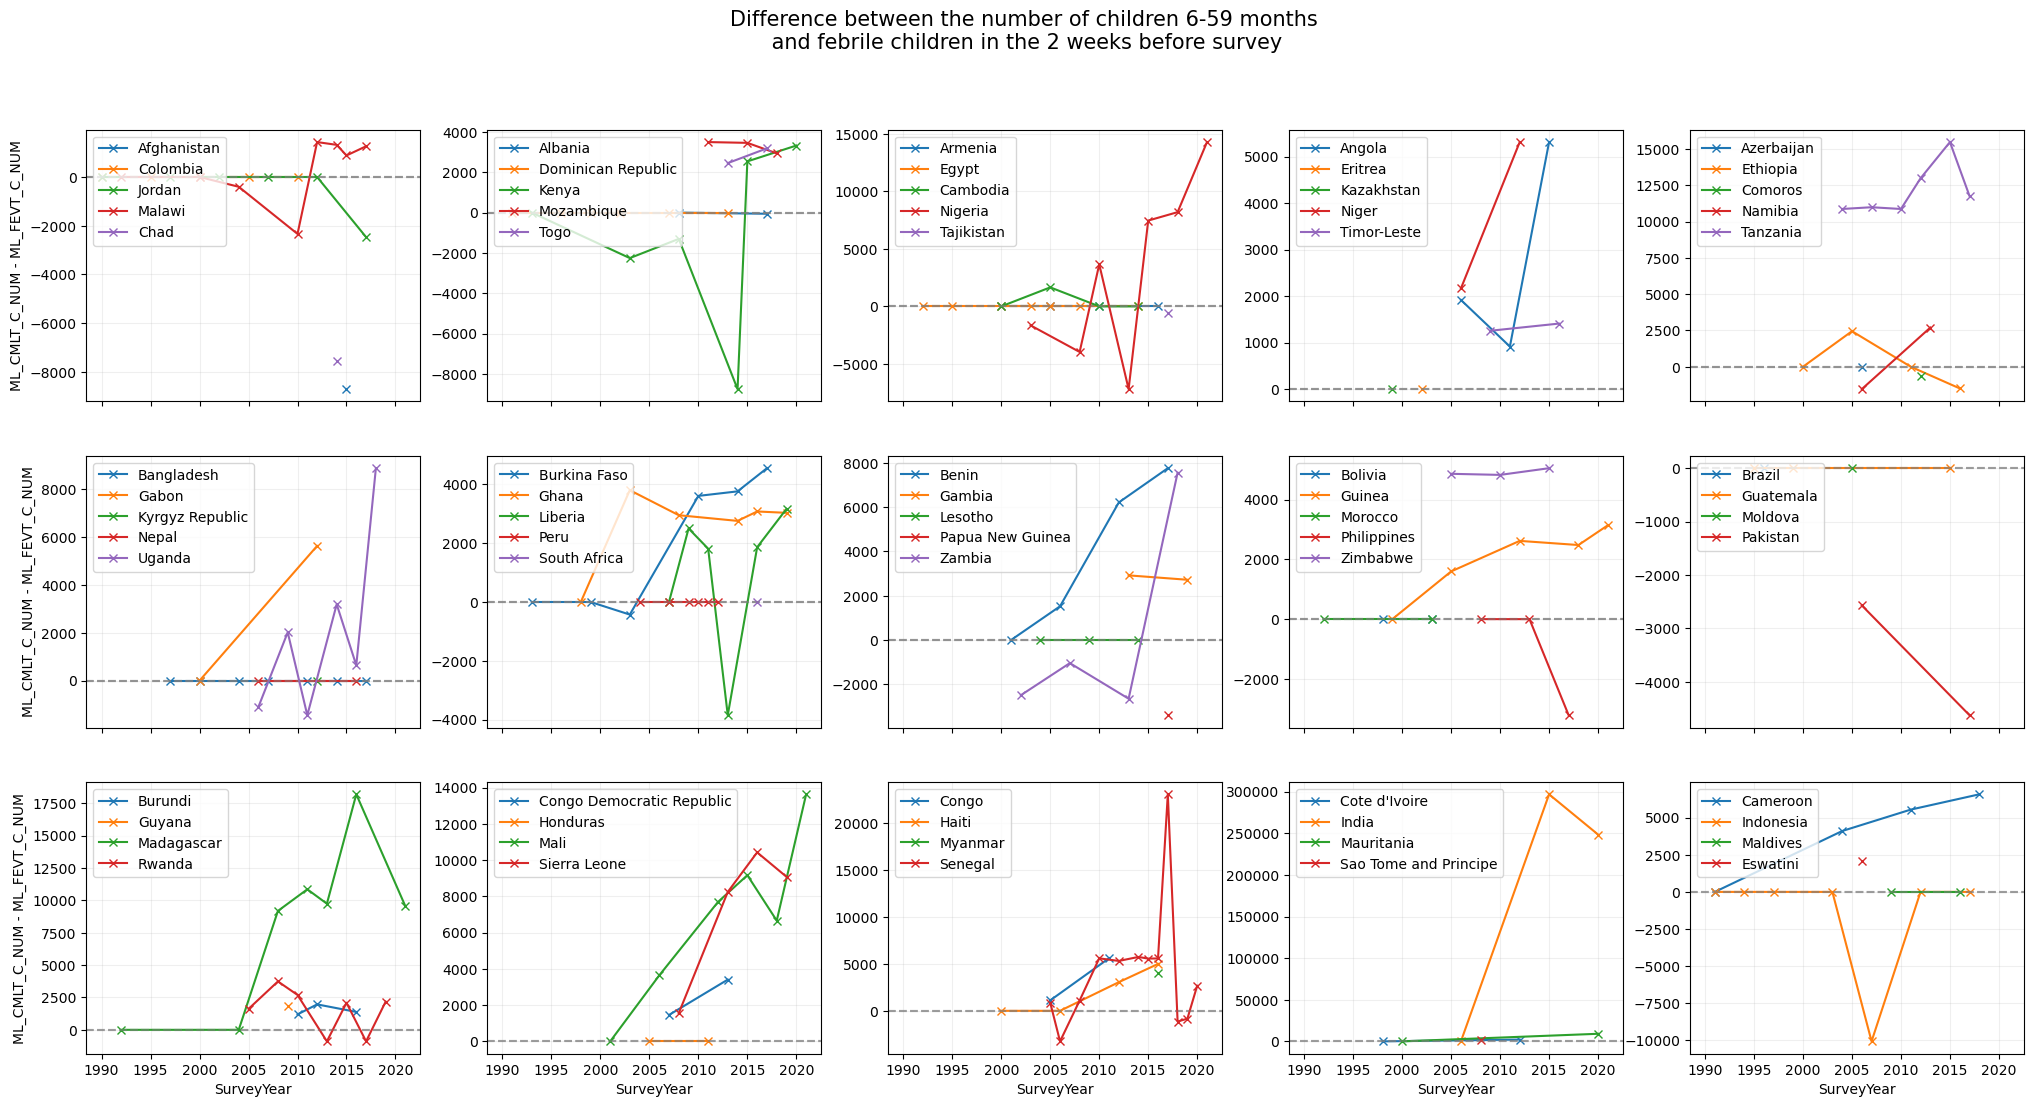

In [36]:
# plot to check if the number of children 6-59 months (ML_CMLT_C_NUM) equals the number of children with fever in the previous 2 weeks (ML_FEVT_C_NUM)
# if this is the case, we would see a horizontal line at y=0
# get list of countries
countries = subntl_v['CountryName'].unique()
# subplots
fig, axs = plt.subplots(3, 5, figsize=(25, 12), sharex=True, sharey=False)
axs_flat = axs.flatten()
# plot each country
for i, country in enumerate(countries):
    # get country data
    country_data = subntl_v[subntl_v['CountryName'] == country]
    country_data = country_data.groupby('SurveyYear').sum()[['ML_CMLT_C_NUM', 'ML_FEVT_C_NUM']]
    (country_data['ML_CMLT_C_NUM'] - country_data['ML_FEVT_C_NUM']).plot(ax=axs_flat[i%15], marker='x', label=country)
    # plot horizontal line at y=0
    axs_flat[i%15].axhline(y=0, color='grey', linestyle='--', alpha=0.3)

# set y label for axes in the first column
for i in range(0, 15, 5):
    axs_flat[i].set_ylabel('ML_CMLT_C_NUM - ML_FEVT_C_NUM')

# show legend in all subplots
for i in range(15):
    axs_flat[i].legend(loc='upper left')
    axs_flat[i].grid(alpha=0.2)

# set figure title
fig.suptitle('Difference between the number of children 6-59 months\n and febrile children in the 2 weeks before survey', fontsize=15)


In [37]:
df_def['frac_test'] = 'Fraction of febrile children under 5 in the previous two weeks who had blood taken from a finger or heel for testing, as from ML_FEVT_C_BLD'

df_def['frac_test_micro'] = 'Fraction of children age 6-59 months tested for malaria by microscopy, as from ML_CMLT_C_MSY'
df_def['frac_micro_pos'] = 'Fraction of children age 6-59 months tested using microscopy who are positive for malaria. as from ML_PMAL_C_MSY'
df_def['frac_micro_pos_se'] = 'Standard error for frac_micro_pos. as from ML_PMAL_C_MSE'
df_def['frac_micro_pos_se_low_ci'] = 'Lower bound CI for frac_micro_pos (-2 se). as from ML_PMAL_C_MSL'
df_def['frac_micro_pos_se_high_ci'] = 'Upper bound CI for frac_micro_pos (+2 se). as from ML_PMAL_C_MSU'
df_def['frac_micro_pos_re'] = 'Relative error for frac_micro_pos. as from ML_PMAL_C_MSR'

df_def['frac_test_rdt'] = 'Fraction of children age 6-59 months tested for malaria by RDT, as from ML_CMLT_C_RDT'
df_def['frac_rdt_pos'] = 'Fraction of children age 6-59 months tested using RDT who are positive for malaria. as from ML_PMAL_C_RDT'
df_def['frac_rdt_pos_se'] = 'Standard error for frac_rdt_pos. as from ML_PMAL_C_RDE'
df_def['frac_rdt_pos_se_low_ci'] = 'Lower bound CI for frac_rdt_pos (-2 se). as from ML_PMAL_C_RDL'
df_def['frac_rdt_pos_se_high_ci'] = 'Upper bound CI for frac_rdt_pos (+2 se). as from ML_PMAL_C_RDU'
df_def['frac_rdt_pos_re'] = 'Relative error for frac_rdt_pos. as from ML_PMAL_C_RDR'

# fraction of febrile children who had blood taken for testing
df['frac_test'] = subntl_v['ML_FEVT_C_BLD']  / 100.0

# microscopy testing
df['frac_test_micro'] = subntl_v['ML_CMLT_C_MSY']  / 100.0
df['frac_micro_pos'] = subntl_v['ML_PMAL_C_MSY']  / 100.0
df['frac_micro_pos_se'] = subntl_v['ML_PMAL_C_MSE']  / 100.0
df['frac_micro_pos_se_low_ci'] = subntl_v['ML_PMAL_C_MSL']  / 100.0
df['frac_micro_pos_se_high_ci'] = subntl_v['ML_PMAL_C_MSU']  / 100.0
df['frac_micro_pos_re'] = subntl_v['ML_PMAL_C_MSR']  / 100.0

# RDT testing
df['frac_test_rdt'] = subntl_v['ML_CMLT_C_RDT']  / 100.0
df['frac_rdt_pos'] = subntl_v['ML_PMAL_C_RDT']  / 100.0
df['frac_rdt_pos_se'] = subntl_v['ML_PMAL_C_RDE']  / 100.0
df['frac_rdt_pos_se_low_ci'] = subntl_v['ML_PMAL_C_RDL']  / 100.0
df['frac_rdt_pos_se_high_ci'] = subntl_v['ML_PMAL_C_RDU']  / 100.0
df['frac_rdt_pos_re'] = subntl_v['ML_PMAL_C_RDR']  / 100.0

### Treatment rate

In [ ]:
## indicators related to therapeutic interventions

# filter rows where Indicator contains 'took', show Indicator and IndicatorId columns, count the occurrences of each IndicatorId
# subntl[subntl['Indicator'].str.contains('took')][['Indicator', 'IndicatorId']].value_counts()# groupby('IndicatorId').count()

indicators[(indicators['Definition'].str.contains('received')) | indicators['Definition'].str.contains('took') ][['IndicatorId', 'Label', 'MeasurementType']].value_counts()

IndicatorId    Label                                                                                            MeasurementType
CH_FEVT_C_ABI  Child took antibiotic drugs for fever                                                            Percent            1
CH_FEVT_C_AML  Child took antimalarial drugs for fever                                                          Percent            1
ML_AMLD_C_ACT  Children who took any ACT                                                                        Percent            1
ML_AMLD_C_AMQ  Children who took Amodiaquine                                                                    Percent            1
ML_AMLD_C_ART  Children who took Artesunate mono therapy                                                        Percent            1
ML_AMLD_C_CHL  Children who took Chloroquine                                                                    Percent            1
ML_AMLD_C_NUM  Number of children under age five with fever that received 

In [41]:
df_def['frac_treat_min'] = 'Min fraction of febrile children under 5 in the previous two weeks who took any antimalarials, as from min(ML_FEVT_C_AML, CH_FEVT_C_AML)'
df_def['frac_treat_max'] = 'Max fraction of febrile children under 5 in the previous two weeks who took any antimalarials, as from min(ML_FEVT_C_AML, CH_FEVT_C_AML)'

# frac_treat_min: same logic as frac_sought_care_min, but using min(ML_FEVT_C_AML, CH_FEVT_C_AML)
df['frac_treat_min'] = np.where(subntl_v['ML_FEVT_C_AML'].notnull() & subntl_v['CH_FEVT_C_AML'].isnull(), subntl_v['ML_FEVT_C_AML'], np.where(subntl_v['CH_FEVT_C_AML'].notnull() & subntl_v['ML_FEVT_C_AML'].isnull(), subntl_v['CH_FEVT_C_AML'], np.where(subntl_v['ML_FEVT_C_AML'].notnull() & subntl_v['CH_FEVT_C_AML'].notnull(), np.minimum(subntl_v['ML_FEVT_C_AML'], subntl_v['CH_FEVT_C_AML']), np.nan)))
df['frac_treat_min'] = df['frac_treat_min'] / 100.0
# frac_treat_max: same logic as frac_sought_care_max, but using max(ML_FEVT_C_AML, CH_FEVT_C_AML)
df['frac_treat_max'] = np.where(subntl_v['ML_FEVT_C_AML'].notnull() & subntl_v['CH_FEVT_C_AML'].isnull(), subntl_v['ML_FEVT_C_AML'], np.where(subntl_v['CH_FEVT_C_AML'].notnull() & subntl_v['ML_FEVT_C_AML'].isnull(), subntl_v['CH_FEVT_C_AML'], np.where(subntl_v['ML_FEVT_C_AML'].notnull() & subntl_v['CH_FEVT_C_AML'].notnull(), np.maximum(subntl_v['ML_FEVT_C_AML'], subntl_v['CH_FEVT_C_AML']), np.nan)))
df['frac_treat_max'] = df['frac_treat_max'] / 100.0


In [42]:
df['frac_treat_min'].isnull().sum()

1376

In [43]:
df.head()

,id,iso2,country,region,year,source,frac_sought_care_max,frac_sought_care_min,frac_test,frac_test_micro,...,frac_micro_pos_se_high_ci,frac_micro_pos_re,frac_test_rdt,frac_rdt_pos,frac_rdt_pos_se,frac_rdt_pos_se_low_ci,frac_rdt_pos_se_high_ci,frac_rdt_pos_re,frac_treat_min,frac_treat_max
0,AFDHS2015534001,AF,Afghanistan,Kabul,2015,DHS,0.569,0.569,0.051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219,0.219
1,AFDHS2015534002,AF,Afghanistan,Kapisa,2015,DHS,0.449,0.449,0.024,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,0.025
2,AFDHS2015534003,AF,Afghanistan,Parwan,2015,DHS,0.669,0.669,0.051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057,0.057
3,AFDHS2015534004,AF,Afghanistan,Wardak,2015,DHS,0.541,0.541,0.029,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.011
4,AFDHS2015534005,AF,Afghanistan,Logar,2015,DHS,0.490,0.490,0.097,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078,0.078


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'frac_sought_care_max'}>,
        <AxesSubplot:title={'center':'frac_sought_care_min'}>,
        <AxesSubplot:title={'center':'frac_test'}>],
       [<AxesSubplot:title={'center':'frac_test_micro'}>,
        <AxesSubplot:title={'center':'frac_micro_pos'}>,
        <AxesSubplot:title={'center':'frac_micro_pos_se'}>,
        <AxesSubplot:title={'center':'frac_micro_pos_se_low_ci'}>],
       [<AxesSubplot:title={'center':'frac_micro_pos_se_high_ci'}>,
        <AxesSubplot:title={'center':'frac_micro_pos_re'}>,
        <AxesSubplot:title={'center':'frac_test_rdt'}>,
        <AxesSubplot:title={'center':'frac_rdt_pos'}>],
       [<AxesSubplot:title={'center':'frac_rdt_pos_se'}>,
        <AxesSubplot:title={'center':'frac_rdt_pos_se_low_ci'}>,
        <AxesSubplot:title={'center':'frac_rdt_pos_se_high_ci'}>,
        <AxesSubplot:title={'center':'frac_rdt_pos_re'}>],
       [<AxesSubplot:title={'center':'frac_

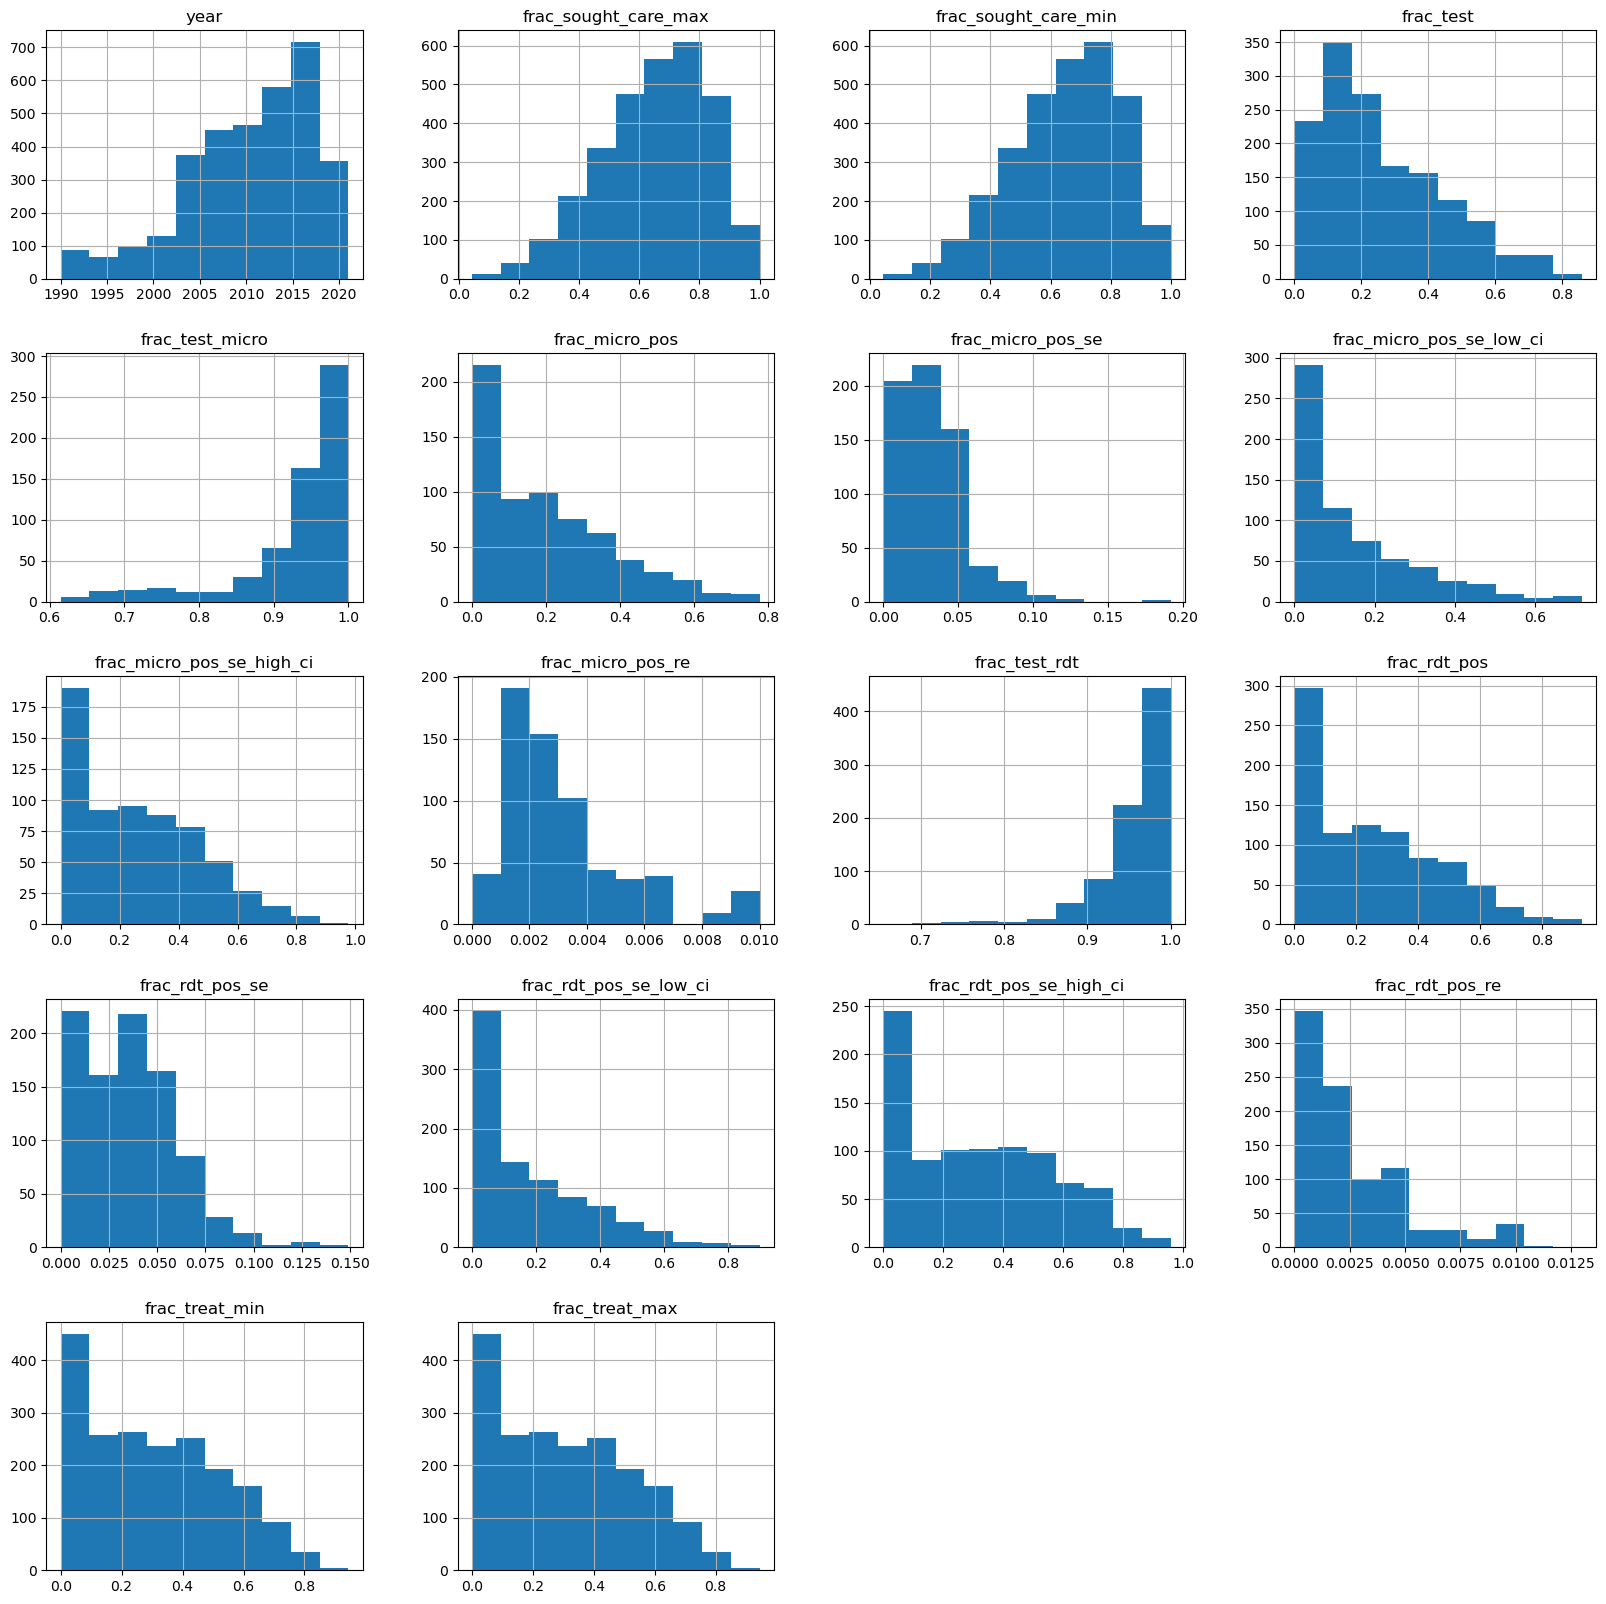

In [44]:
# histogram of each column
df.hist(figsize=(20,20))


In [ ]:
# save to csv
df.to_csv('dhs_subntl_clean.csv', index=False)